Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("car data.csv")

Saving car data.csv to car data.csv


Data Exploration

In [ ]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.shape

(301, 9)

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

Feature Engineering

In [ ]:
current_year = 2025
df['Car_Age'] = current_year - df['Year']

In [ ]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100', 'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street', 'Car_Name_Bajaj Avenger 220', 'Car_Name_Bajaj Avenger 220 dtsi', 'Car_Name_Bajaj Avenger Street 220', 'Car_Name_Bajaj Discover 100', 'Car_Name_Bajaj Discover 125', 'Car_Name_Bajaj Dominar 400', 'Car_Name_Bajaj Pulsar  NS 200', 'Car_Name_Bajaj Pulsar 135 LS', 'Car_Name_Bajaj Pulsar 150', 'Car_Name_Bajaj Pulsar 220 F', 'Car_Name_Bajaj Pulsar NS 200', 'Car_Name_Bajaj Pulsar RS200', 'Car_Name_Hero  CBZ Xtreme', 'Car_Name_Hero  Ignitor Disc', 'Car_Name_Hero Extreme', 'Car_Name_Hero Glamour', 'Car_Name_Hero Honda CBZ extreme', 'Car_Name_Hero Honda Passion Pro', 'Car_Name_Hero Hunk', 'Car_Name_Hero Passion Pro', 'Car_Name_Hero Passion X pro', 'Car_Name_Hero Splender Plus', 'Car_Name_Hero Splender iSmart', 'Car_Name_Hero Super Splendor', 'Car_Name_Honda Activa 125', 'Car_Name_Honda Activa 4G', 

In [ ]:
features = ['Present_Price', 'Driven_kms', 'Owner', 'Car_Age','Fuel_Type_Diesel', 'Fuel_Type_Petrol','Selling_type_Individual', 'Transmission_Manual']
X = df[features]
y = df['Selling_Price']

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Compare Actual vs Predicted

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

     Actual  Predicted
283    8.99   7.500495
267    8.35   7.791134
166    0.45   1.365253
9      7.45   7.008954
78     5.25  11.165011
280    5.25   4.533817
95     5.85   8.491541
111    1.15   1.699151
5      9.25   8.822632
175    0.38  -0.963260


Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.7527233824220487
MAE: 1.4725457508178639
MSE: 6.373125106260704
RMSE: 2.5245049230018752


Scatter Plot (Actual vs Predicted)

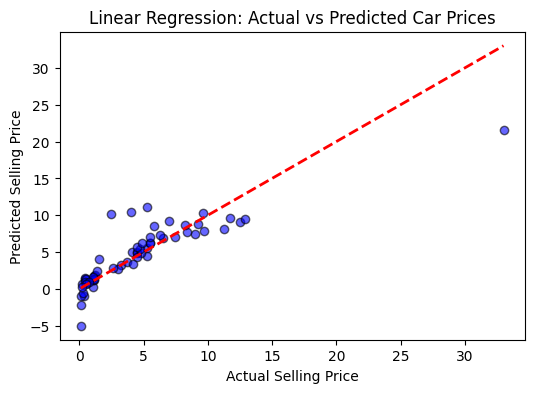

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Linear Regression: Actual vs Predicted Car Prices")
plt.show()

Residual Plot

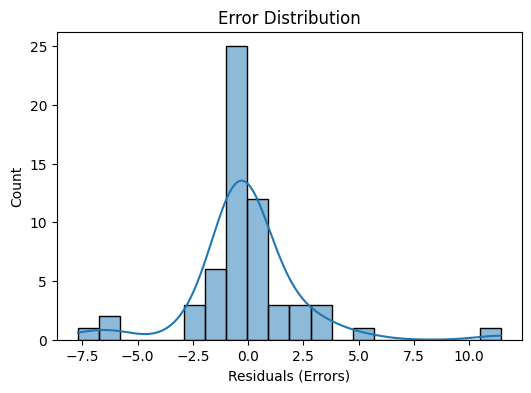

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot((y_test - y_pred), bins=20, kde=True)
plt.xlabel("Residuals (Errors)")
plt.title("Error Distribution")
plt.show()

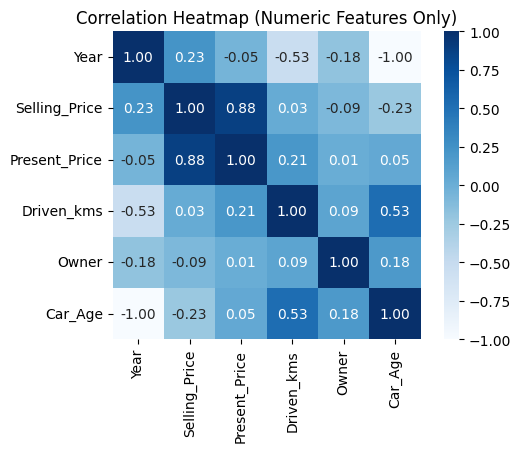

In [ ]:
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues", fmt=".2f", square=True)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()